<a href="https://colab.research.google.com/github/FilipeSquire/Advanced-Analytics/blob/main/Titanic_EDA_I2A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.style as style

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [66]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [67]:
file2 = drive.CreateFile({'id':'1zzHnIx2cJdaskKNYAqujwrOwYSxT3l8N'})
file2.GetContentFile('Train.xlsx')
train = pd.read_excel('Train.xlsx')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   survived        891 non-null    int64  
 3   name            891 non-null    object 
 4   sex             891 non-null    object 
 5   age             714 non-null    float64
 6   sibsp           891 non-null    int64  
 7   parch           891 non-null    int64  
 8   ticket          891 non-null    object 
 9   fare            891 non-null    float64
 10  cabin           204 non-null    object 
 11  embarked        889 non-null    object 
 12  boat            330 non-null    object 
 13  body            83 non-null     float64
 14  home.dest       499 non-null    object 
 15  orig_seq        891 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [68]:
file2 = drive.CreateFile({'id':'12_R2aDGblHLN6Va6U_EV-_gWbAkb2hsj'})
file2.GetContentFile('Test.xlsx')
test = pd.read_excel('Test.xlsx')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  418 non-null    int64  
 1   pclass          418 non-null    int64  
 2   name            418 non-null    object 
 3   sex             418 non-null    object 
 4   age             332 non-null    float64
 5   sibsp           418 non-null    int64  
 6   parch           418 non-null    int64  
 7   ticket          418 non-null    object 
 8   fare            417 non-null    float64
 9   cabin           91 non-null     object 
 10  embarked        418 non-null    object 
 11  boat            156 non-null    object 
 12  body            38 non-null     float64
 13  home.dest       246 non-null    object 
 14  orig_seq        418 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 49.1+ KB


#Setting up Spark

In [8]:
!apt-get install openjdk-8-jdk-headless -qq
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz
!tar xf spark-3.2.0-bin-hadoop2.7.tgz
!pip install -q findspark

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"

In [10]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.0-bin-hadoop2.7'

In [11]:
#Creating entry point for spark
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark

#Overview

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   survived        891 non-null    int64  
 3   name            891 non-null    object 
 4   sex             891 non-null    object 
 5   age             714 non-null    float64
 6   sibsp           891 non-null    int64  
 7   parch           891 non-null    int64  
 8   ticket          891 non-null    object 
 9   fare            891 non-null    float64
 10  cabin           204 non-null    object 
 11  embarked        889 non-null    object 
 12  boat            330 non-null    object 
 13  body            83 non-null     float64
 14  home.dest       499 non-null    object 
 15  orig_seq        891 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


We have in total:
* int64(6): Kaggle_Pass_ID, pclass, survived, sibsp, parch, orig_seq
* float64(3): age, fare, body
* object(7): name, sex, ticket, cabin, embarked, boat, home.dest

Apparently we have missing data at the columns: 

* age
* cabin
* embarked
* boat
* body
* home.dest. 



# Survivors

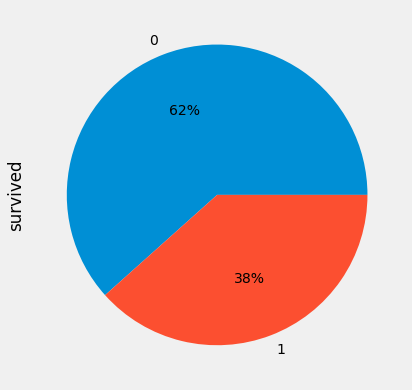

In [ ]:
graph = train.copy()

plt.figure(figsize=(6,12))
graph.groupby('survived')['survived'].count().plot(kind='pie',autopct='%.0f%%')
plt.show()


# Missing

In [ ]:
suporte = ['age', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
suporte

['age', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

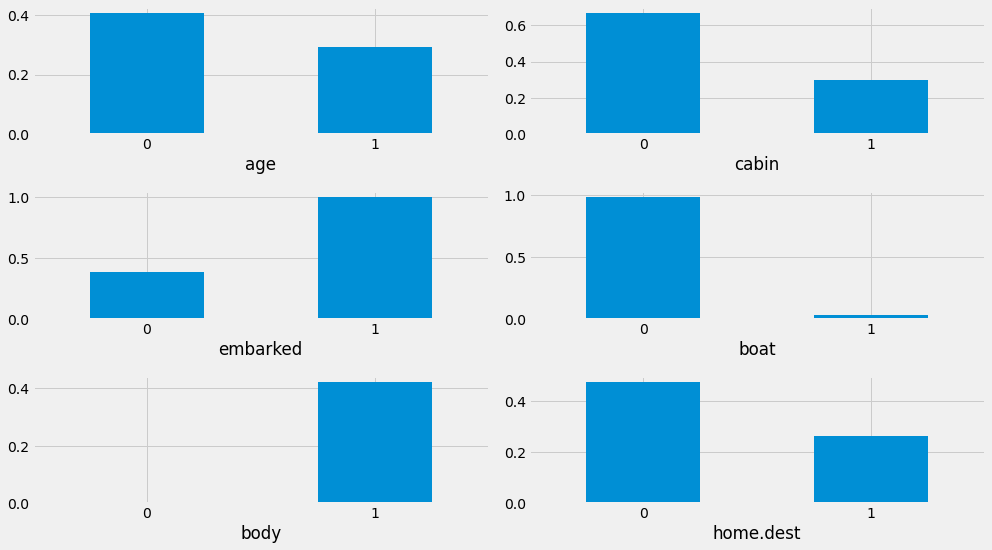

In [ ]:
style.use('fivethirtyeight')
graf = train.copy()

suporte2 = 1

fig = plt.figure(figsize=(14,15))

for x in suporte:
    #null to 1, notnull to 0

    graf[x] = np.where(graf[x].isnull(),1,0)
    
    plt.subplot(len(suporte),2,suporte2)

    graf.groupby(x)['survived'].mean().plot.bar()
    plt.xticks(rotation = 0)
    suporte2 = suporte2+1
    
fig.tight_layout()
plt.show()

Apparently most people that survived have missing values in the columns

* age - people with missing data survived the crash
* embarked - most people with missing data have survived
* body - all people that survived have missing data
* cabin - most people with cabin data missing didnt survive
* boat - most people with data missing didnt survive
* home.dest - some people with data missing didnt survive

# Categorical Variables

Let's check how the state of our categorical variables which are:
* survived
* sex
* Pclass
* embarked
* sibsp
* parch

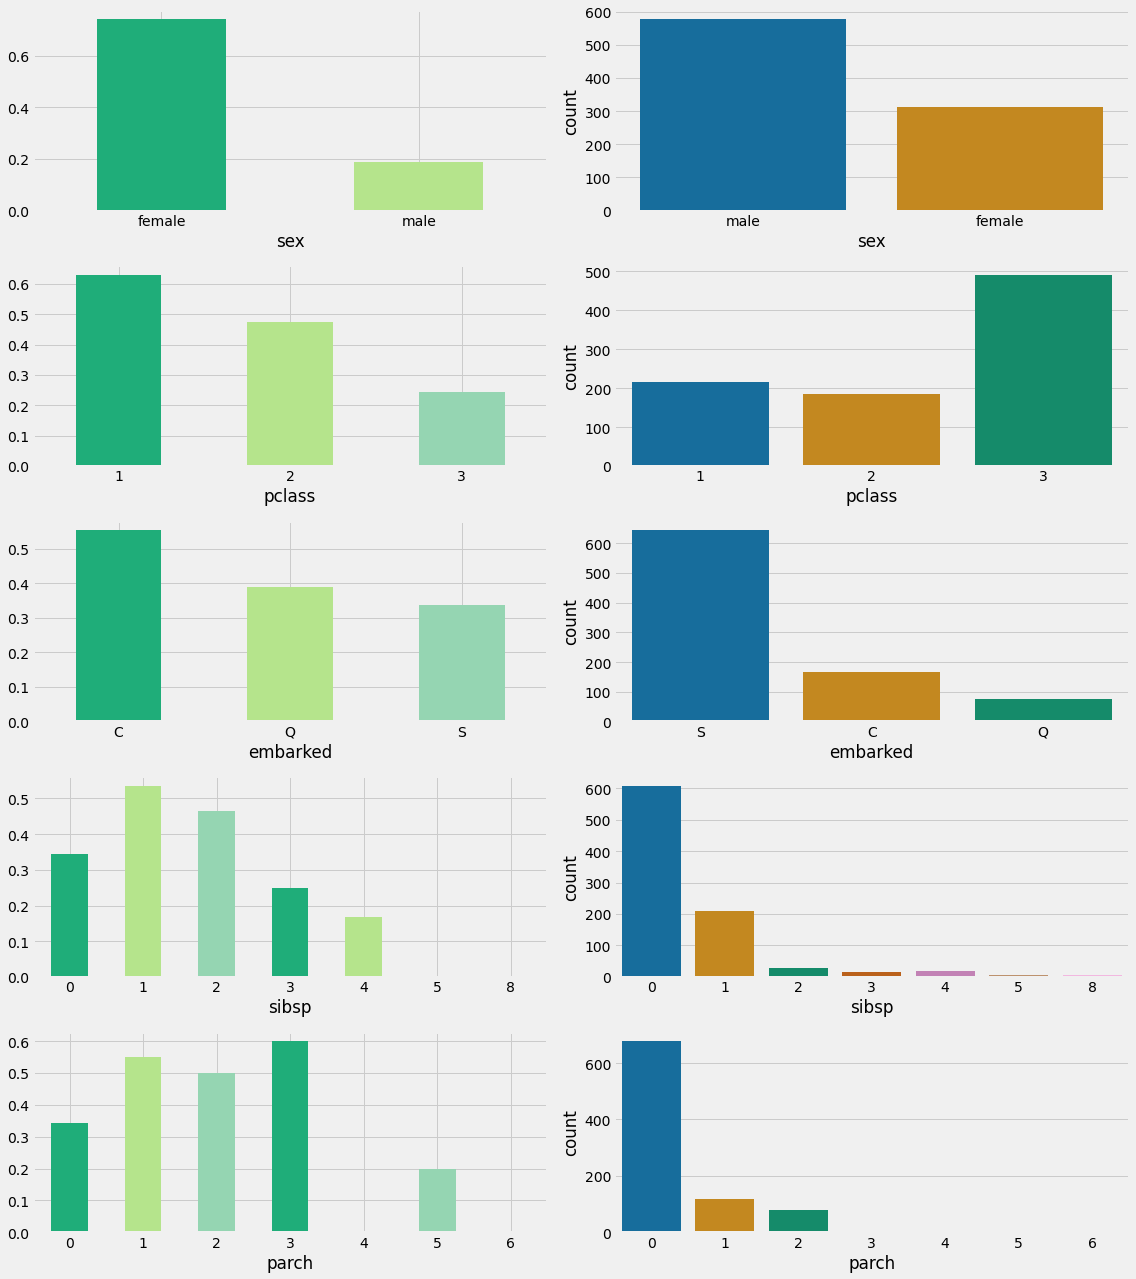

In [91]:
suporte = ['sex','pclass','embarked','sibsp','parch']

style.use('fivethirtyeight')
fig=plt.figure(figsize=(16,18))

sup2=1
graph=train.copy()

for x in suporte:
    plt.subplot(len(suporte),2,sup2)
   
   #here we have the mean of survivals at each variable-category
    graph.groupby(x)['survived'].mean().plot(kind='bar',color=['#1fad79','#b5e48c','#95d5b2'])
    plt.xticks(rotation=0) 
    sup2 = sup2 + 1 
    
    #here we check the count of each of these variable-category
    plt.subplot(len(suporte),2,sup2)
    sns.countplot(x = graph[x], palette = "colorblind") 
    sup2 = sup2 + 1  
     

fig.tight_layout()
plt.show()

* **Sex ->** female have a higher chance of survival. Most of the passanger are male.
* **PClass ->** The greater the socio-economic status, higher the odds of survival. Most of the passanger are 3rd class.
* **Embarked ->** those that embarked at C (CHerbourg) have greater odds of survival. Most passangers embarked at S (Southampton), and C is the smallest group.
* **sibsp ->** Greatest odds of survival are people with 1, 2 and 0 siblings/spouses. Most passangers have 0 siblings aboards.
* **parch ->** doesnt seem to have a clear pattern. Most of the passangers have 0 parents aboard.


# Pclass Deep view

In [37]:
train['pclass'].loc[train['age'].isna() == True].value_counts()

3    136
1     30
2     11
Name: pclass, dtype: int64

Class 1 Sex male Mean 41.28 Amount 101
Class 1 Sex female Mean 34.61 Amount 85
Class 2 Sex male Mean 30.74 Amount 99
Class 2 Sex female Mean 28.72 Amount 74
Class 3 Sex male Mean 26.51 Amount 253
Class 3 Sex female Mean 21.75 Amount 102


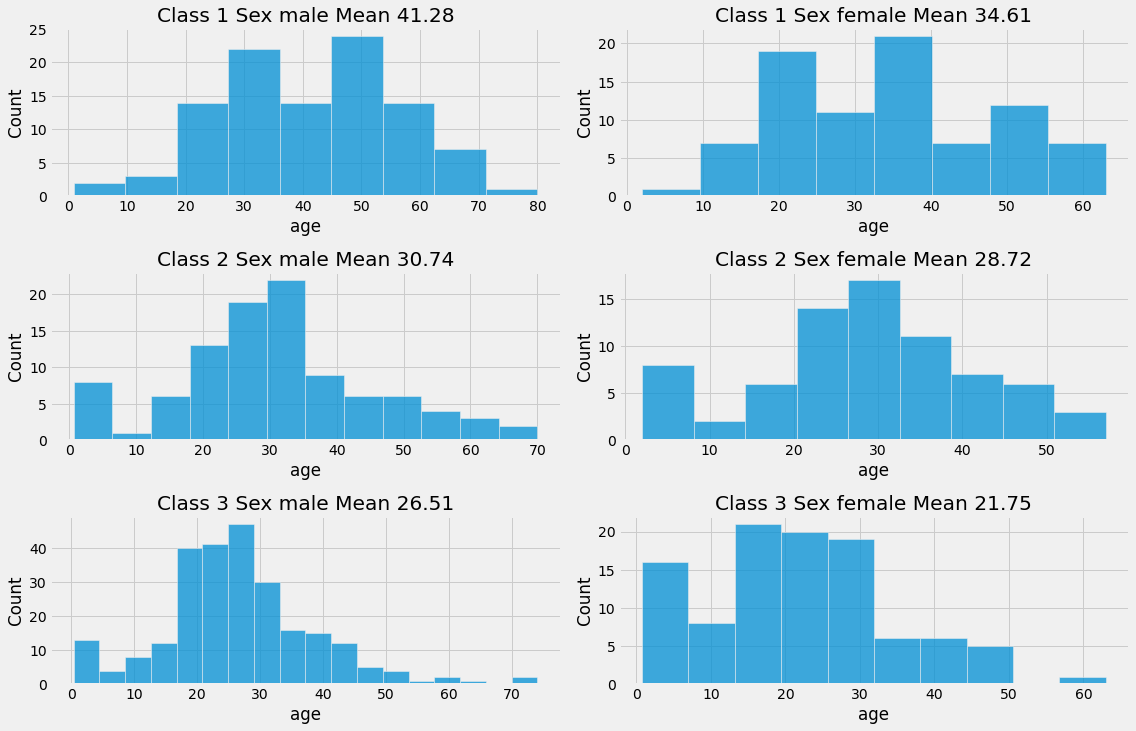

In [72]:
style.use('fivethirtyeight')
fig=plt.figure(figsize=(16,20))

sup2 = 1
for x in range(1,4):
  for y in train.sex.unique():

    plt.subplot(6,2,sup2)

    plt.title('Class ' + str(x) + 
              ' Sex ' + str(y) + 
              ' Mean ' + str(round(train['age'].loc[(train['pclass']==x) & (train['sex']==y)].mean(),2))
              )
    
    sns.histplot(train['age'].loc[(train['pclass']==x) & (train['sex']==y)])
    sup2 = sup2+1
    
    print('Class ' + str(x) + 
              ' Sex ' + str(y) + 
              ' Mean ' + str(round(train['age'].loc[(train['pclass']==x) & (train['sex']==y)].mean(),2)) +
              ' Amount ' + str(train['age'].loc[(train['pclass']==x) & (train['sex']==y)].count()))

fig.tight_layout()
plt.show()

Apparently the 3 Class has is the most juvenile, followed by the second and first class. It makes sense since their distributed as accordingly:

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

The classes distributions are as follows:
* Class 1 -> **Male** Total 101 (54.3%), Mean Age 41.28 | **Female** Total 85 (45.7%), Mean Age 34.61
* Class 2 -> **Male** Total 99 (57.2%), Mean Age 30.74 | **Female** Total 74 (42.8%), Mean Age 28.72
* Class 3 -> **Male** Total 253 (71.2%), Mean Age 26.51 | **Female** Total 102 (28.8%), Mean Age 21.75

#Age DeepView

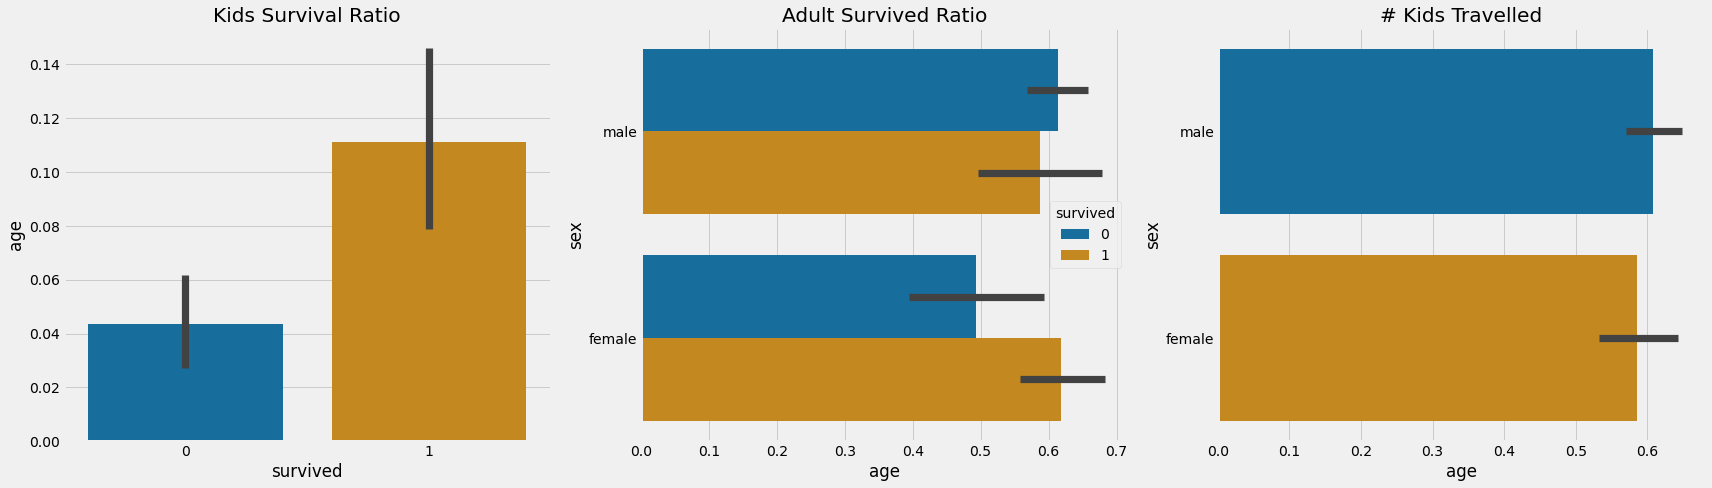

In [92]:
# Let us see how many kids survived the crash

fig = plt.figure(figsize=(24,7))


#Kids that survived
graph = train.copy()
graph['age'] = graph['age'] < 10
plt.subplot(1,3,1)
style.use('fivethirtyeight')

plt.title('Kids Survival Ratio')
sns.barplot(y=graph['age'],x=graph['survived'],palette='colorblind')


# No.of piotential parent/s survived with respect to age
graph = train.copy()
graph['age'] = graph['age'] > 20

plt.subplot(1,3,2)
style.use('fivethirtyeight')

plt.title('Adult Survived Ratio')
sns.barplot(y=graph['sex'],x=graph['age'],hue=graph['survived'],palette='colorblind')

# No.of children travelled below age 10
graph = train.copy()
graph['age'] = graph['age'] > 20

plt.subplot(1,3,3)
style.use('fivethirtyeight')

plt.title('# Kids Travelled')
sns.barplot(x=graph['age'],y=graph['sex'],palette='colorblind')


fig.tight_layout()
plt.show()

* As we may see there's an expressive correlation between survivability and kids.
* Females have higher odds of survival


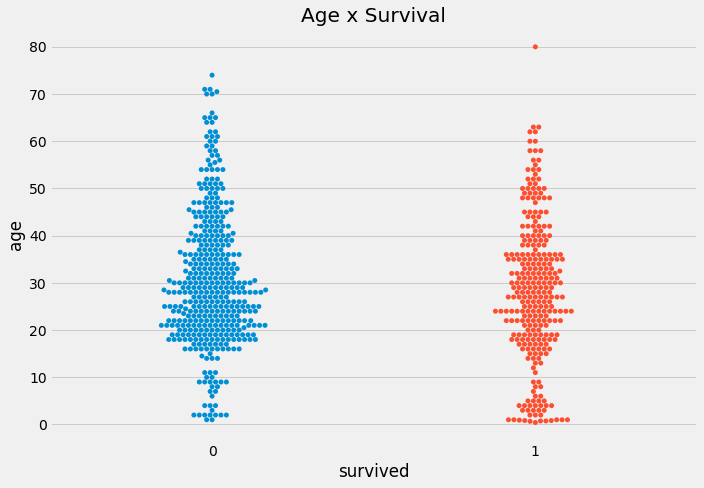

In [96]:
fig = plt.figure(figsize=(10,7))

sns.swarmplot(x=train['survived'], y=train['age'])
plt.title('Age x Survival')

fig.tight_layout()
plt.show()

Having a more broader view on age survivability, it seems that there's a spike at kids age below 10 and then a normal distribution between 20 to 40 years.

#Resume

Apparently most people that survived have missing values in the columns

* age - people with missing data survived the crash
* embarked - most people with missing data have survived
* body - all people that survived have missing data
* cabin - most people with cabin data missing didnt survive
* boat - most people with data missing didnt survive
* home.dest - some people with data missing didnt survive

Category values resume

* **Sex ->** female have a higher chance of survival. Most of the passanger are male.
* **PClass ->** The greater the socio-economic status, higher the odds of survival. Most of the passanger are 3rd class.
* **Embarked ->** those that embarked at C (CHerbourg) have greater odds of survival. Most passangers embarked at S (Southampton), and C is the smallest group.
* **sibsp ->** Greatest odds of survival are people with 1, 2 and 0 siblings/spouses. Most passangers have 0 siblings aboards.
* **parch ->** doesnt seem to have a clear pattern. Most of the passangers have 0 parents aboard.


Apparently the 3 Class has is the most juvenile, followed by the second and first class. It makes sense since their distributed as accordingly:

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

The classes distributions are as follows:
* Class 1 -> **Male** Total 101 (54.3%), Mean Age 41.28 | **Female** Total 85 (45.7%), Mean Age 34.61
* Class 2 -> **Male** Total 99 (57.2%), Mean Age 30.74 | **Female** Total 74 (42.8%), Mean Age 28.72
* Class 3 -> **Male** Total 253 (71.2%), Mean Age 26.51 | **Female** Total 102 (28.8%), Mean Age 21.75

In resume it seems that the **greater your social-economics** status the **bigger your** odds of **survival are**. Afterwards, **being a kid or a woman** are the following **most important features to guarantee the survivability**.

Related to the missing values I came to an assumption that:
* **body ->** those that had their body value filled were the dead bodies found afterwards or missing.
* **boat ->** it appears that those that has the value filled were the ones that survived